In [194]:
import arviz as az
import bambi as bmb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm

In [195]:
data = pd.read_csv("../datasets/model_dataset.csv")
data.columns

Index(['Unnamed: 0', 'edu', 'edu_level', 'elementary_edu', 'highschool_edu',
       'postsec_edu', 'undergrad_edu', 'graduate_edu',
       'grad_highschool_refyear', 'grad_college_refyear', 'grad_univ_refyear',
       'student_status', 'public_sector', 'private_sector', 'lfs', 'occup',
       'industry', 'self_emp', 'union', 'part_time', 'major_activity',
       'major_source_inc', 'multiple_jobs', 'num_jobs', 'exp', 'reason_pt',
       'hourly_wage', 'hours_paid', 'months_last_worked', 'tenure', 'sex',
       'age', 'year', 'weight', 'salary', 'firm_size', 'loc_size',
       'firm_size_<20', 'firm_size_20 to 99', 'firm_size_100 to 499',
       'firm_size_500 to 999', 'firm_size_+1000', 'loc_size_<20',
       'loc_size_20 to 99', 'loc_size_100 to 499', 'loc_size_500 to 999',
       'loc_size_+1000'],
      dtype='object')

In [196]:
data = data.dropna(subset="industry")
data.industry.value_counts(dropna=False)

data = data.dropna(subset="occup")
data.occup.value_counts(dropna=False)

occup
clerical and supervisor occupations                               9835
middle management                                                 7293
machine operators and assemblers in manufacturing                 6434
natural and applied sciences                                      5956
other trades                                                      5613
financial, secretarial and administrative                         4955
retail salespersons, sales clerks, cashiers                       4278
teachers and professors                                           4265
sales and service                                                 3484
occupations in social science, government service and religion    3132
transport and equipment operators                                 2956
technical, assisting and related in health                        2798
professional in health                                            2243
wholesale, technical, insurance, real estate sales specialists    2188


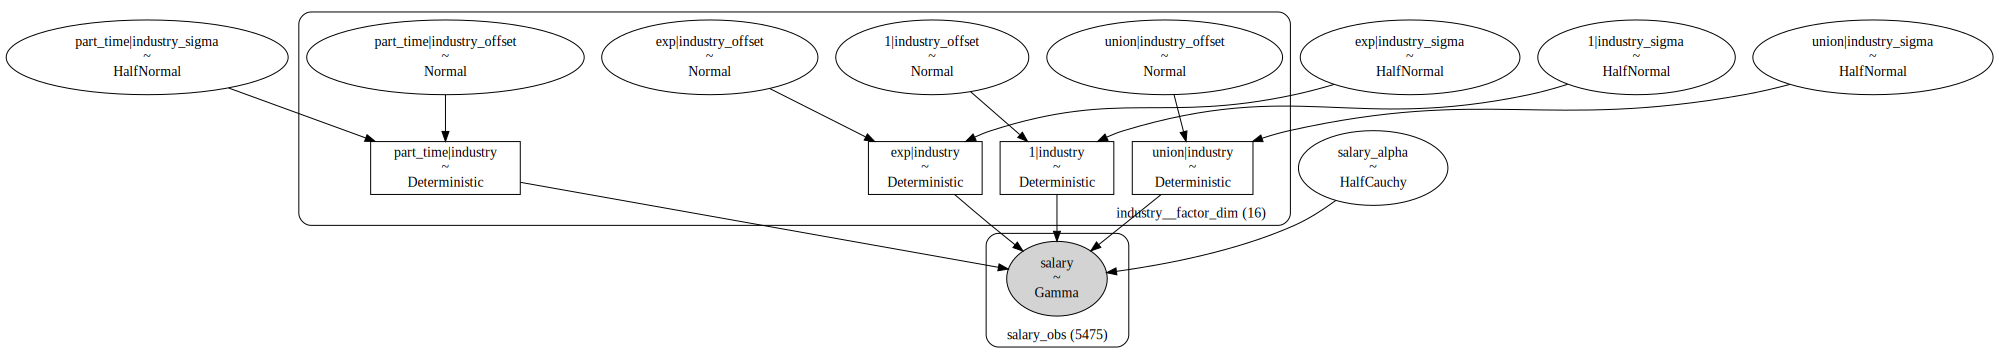

In [213]:
model = bmb.Model('salary ~ 0 + (1|industry) + (exp|industry) + (union|industry) + (part_time|industry)', data.query("year == 1999"),
                  family='gamma', link='log')
model.build()

model.graph()

In [218]:
import pytensor

pytensor.config.floatX = 'float32'
pytensor.config.floatX

'float32'

In [219]:
# Fit the model using 1000 on each of 4 chains
results = model.fit(tune=1000, target_accept=0.9, idata_kwargs={"log_likelihood": True}, inference_method='nuts_numpyro')

Compiling...
Compilation time =  0:00:06.070273
Sampling...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Sampling time =  0:15:05.063656
Transforming variables...
Transformation time =  0:00:00.019848
Computing Log Likelihood...
Log Likelihood time =  0:00:01.176063


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
salary_alpha,3.464,0.062,3.348,3.585,0.001,0.001,4251.0,2812.0,1.00
1|industry_sigma,8.575,0.979,6.697,10.303,0.066,0.047,213.0,398.0,1.02
exp|industry_sigma,0.018,0.004,0.012,0.026,0.000,0.000,505.0,1222.0,1.00
union|industry_sigma,0.138,0.040,0.071,0.210,0.002,0.001,703.0,1824.0,1.01
part_time|industry_sigma,0.858,0.187,0.553,1.199,0.008,0.006,562.0,994.0,1.01
...,...,...,...,...,...,...,...,...,...
"part_time|industry[professional, scientific and technical services]",-0.988,0.171,-1.298,-0.667,0.002,0.002,5603.0,2870.0,1.00
part_time|industry[public administration],-0.977,0.156,-1.266,-0.688,0.002,0.001,6257.0,3228.0,1.00
part_time|industry[trade],-0.863,0.052,-0.962,-0.766,0.001,0.001,4602.0,3262.0,1.00
part_time|industry[transportation and warehousing],-0.740,0.122,-0.953,-0.499,0.002,0.001,5632.0,2995.0,1.00


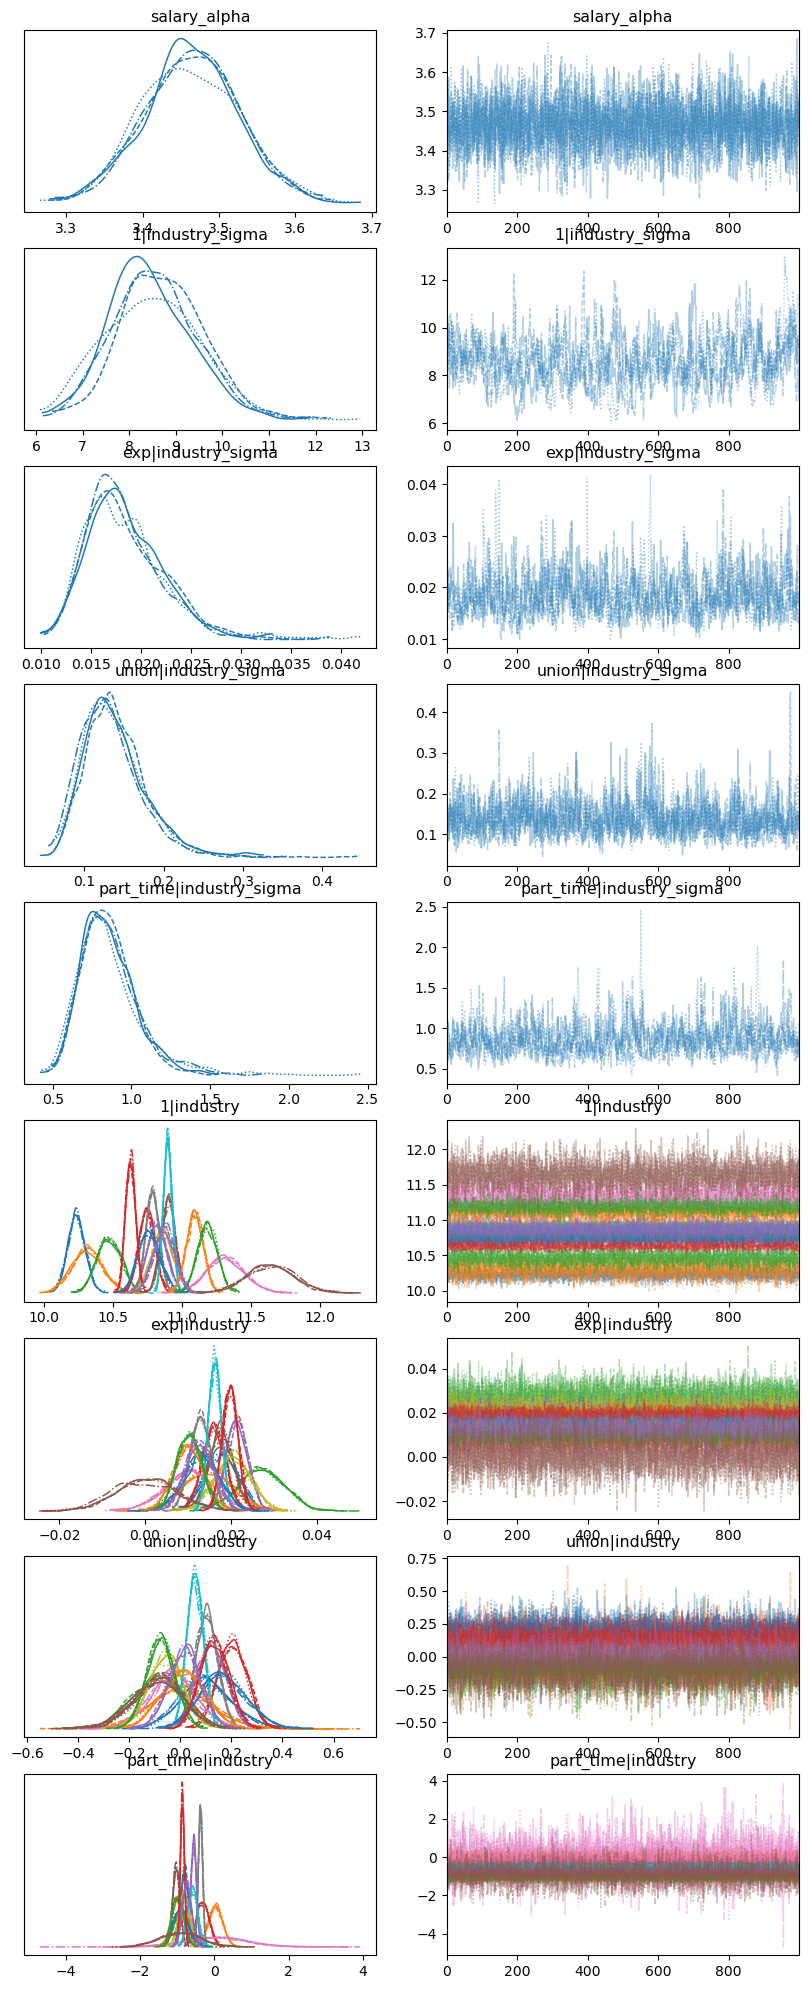

In [220]:
# Use ArviZ to plot the results
az.plot_trace(results, figsize=(10, 25))

# Key summary and diagnostic info on the model parameters
az.summary(results)

In [209]:
results = results.posterior.drop_vars("salary_mean")

In [201]:
model.predict(results, kind="pps")

In [202]:
pps = az.extract_dataset(results, group="posterior_predictive")["salary"].values

/tmp/ipykernel_20808/928730340.py:1: FutureWarning: extract_dataset has been deprecated, please use extract
  pps = az.extract_dataset(results, group="posterior_predictive")["salary"].values


<Axes: ylabel='Density'>

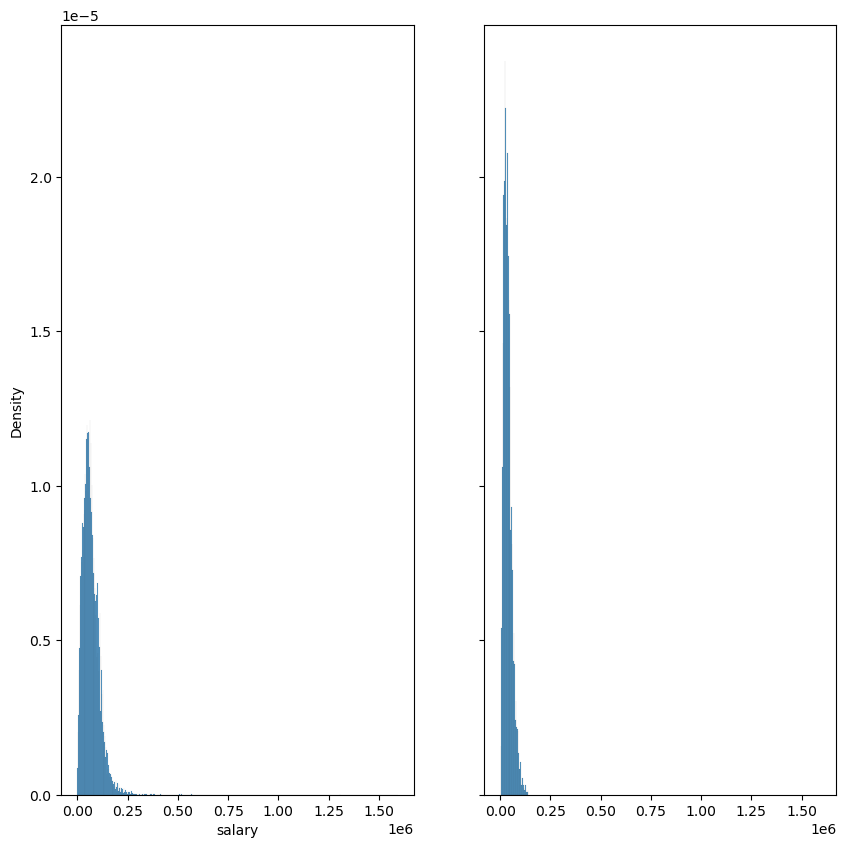

In [203]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 10), sharex=True, sharey=True)
sns.histplot(data.salary, stat="density", ax=ax[0])
sns.histplot(x=pps[0].flatten(), stat="density", color="C0", ax=ax[1])


# Test

In [188]:
n = 10000
industry = np.random.choice([0,1,2], n)
exp = np.random.binomial(1, 0.5, n)

intercept = np.array([100,125,150])
# b_exp = 50
b_exp = np.array([50,60,70])

# salary = intercept[industry] + np.random.normal(0, 10, n)
# salary = intercept[industry] + b_exp * exp + np.random.normal(0, 30, n)
salary = intercept[industry] + b_exp[industry] * exp + np.random.normal(0, 30, n)

data = pd.DataFrame({"industry": industry, "exp": exp, "salary": salary})

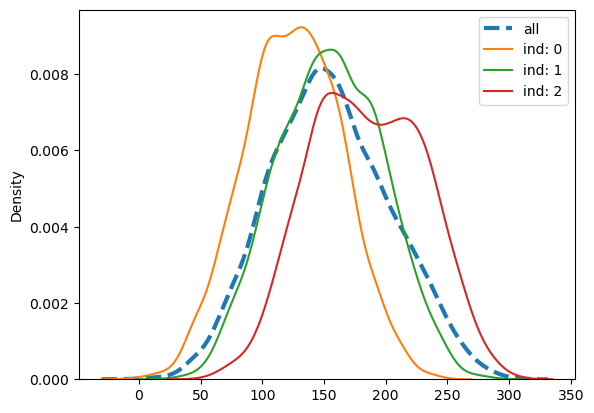

In [189]:
sns.kdeplot(salary, label="all", linewidth=3, linestyle="--")
sns.kdeplot(salary[industry==0], label="ind: 0")
sns.kdeplot(salary[industry==1], label="ind: 1")
sns.kdeplot(salary[industry==2], label="ind: 2")
plt.legend()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, b_exp, sigma]


Sampling 4 chains for 4_000 tune and 4_000 draw iterations (16_000 + 16_000 draws total) took 29 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept[0],100.181,0.238,99.740,100.641,0.002,0.001,14432.0,11460.0,1.0
intercept[1],125.101,0.240,124.664,125.561,0.002,0.002,12073.0,11697.0,1.0
intercept[2],150.237,0.238,149.775,150.668,0.002,0.002,12405.0,10762.0,1.0
b_exp[0],-0.621,0.327,-1.248,-0.022,0.003,0.002,14537.0,12195.0,1.0
b_exp[1],-0.300,0.331,-0.917,0.315,0.003,0.002,11864.0,11954.0,1.0
b_exp[2],-0.348,0.327,-0.983,0.253,0.003,0.002,13037.0,11495.0,1.0
sigma,10.084,0.071,9.956,10.225,0.001,0.000,19080.0,11813.0,1.0


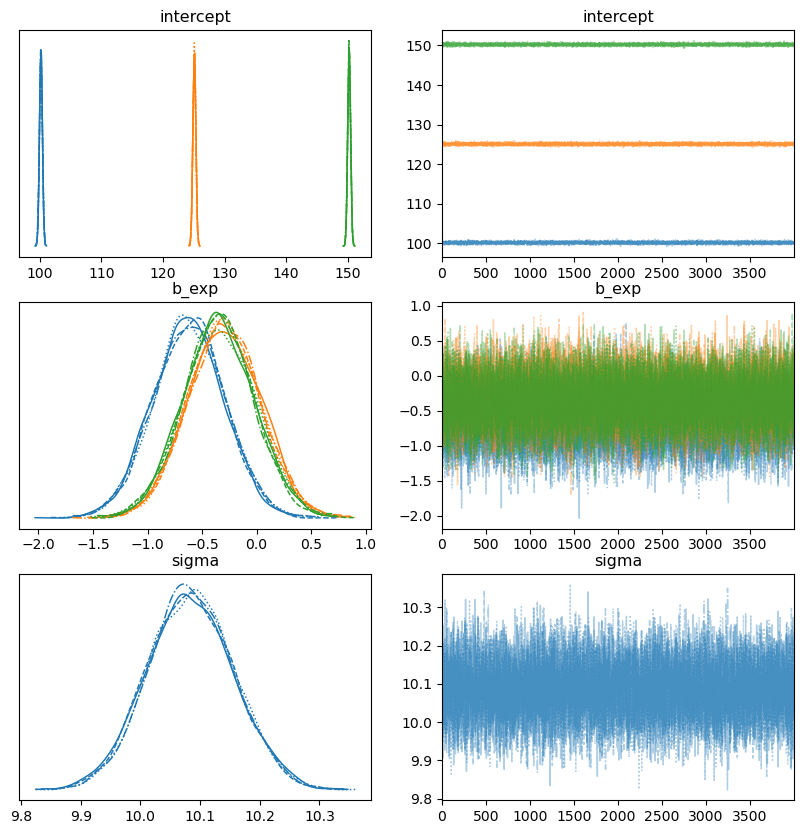

In [159]:
coords = {
    "industry": [0,1,2],
}

with pm.Model(coords=coords) as model:
    intercept = pm.Normal("intercept", 0, 10, dims="industry")
    b_exp = pm.Normal("b_exp", 0, 1, dims="industry")
    sigma = pm.Exponential("sigma", 1)
    
    mu = intercept[industry] + b_exp[industry] * exp
    salary_hat = pm.Normal("salary_hat", mu, sigma, observed=salary)
    
    trace = pm.sample(4000, tune=4000, target_accept=0.9, return_inferencedata=True)

pm.model_to_graphviz(model)

az.plot_trace(trace, figsize=(10, 10));
az.summary(trace)

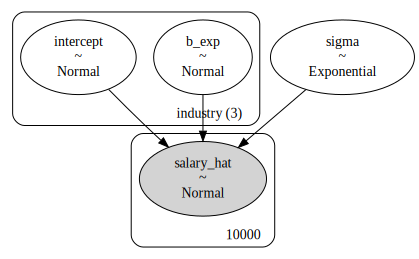

In [163]:
pm.model_to_graphviz(model)

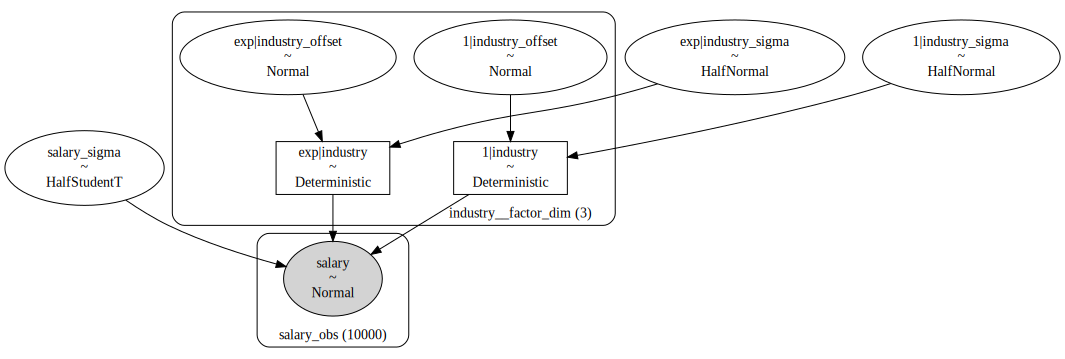

In [191]:
test = bmb.Model("salary ~ 0 + (1|industry) + (exp|industry)", data)
test.build()
test.graph()

In [192]:
results = test.fit(tune=2000, target_accept=0.95, idata_kwargs={"log_likelihood": True}, inference_method='nuts_numpyro')

Compiling...
Compilation time =  0:00:02.382430
Sampling...


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Sampling time =  0:02:38.749615
Transforming variables...
Transformation time =  0:00:00.012713
Computing Log Likelihood...
Log Likelihood time =  0:00:00.699637


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
salary_sigma,30.102,0.216,29.718,30.521,0.006,0.005,1142.0,1294.0,1.01
1|industry_sigma,138.913,48.013,60.005,223.869,2.189,1.549,411.0,665.0,1.01
exp|industry_sigma,99.131,60.462,33.948,204.992,2.369,1.676,479.0,703.0,1.01
1|industry[0],100.201,0.728,98.786,101.537,0.012,0.008,3955.0,3230.0,1.00
1|industry[1],125.080,0.721,123.738,126.399,0.011,0.008,4073.0,3776.0,1.00
1|industry[2],150.640,0.740,149.200,151.961,0.012,0.008,4140.0,3549.0,1.00
exp|industry[0],49.745,1.031,47.774,51.614,0.016,0.012,3949.0,2962.0,1.00
exp|industry[1],59.627,1.021,57.619,61.437,0.016,0.011,4202.0,3699.0,1.00
exp|industry[2],69.663,1.050,67.737,71.702,0.017,0.012,3825.0,3160.0,1.00


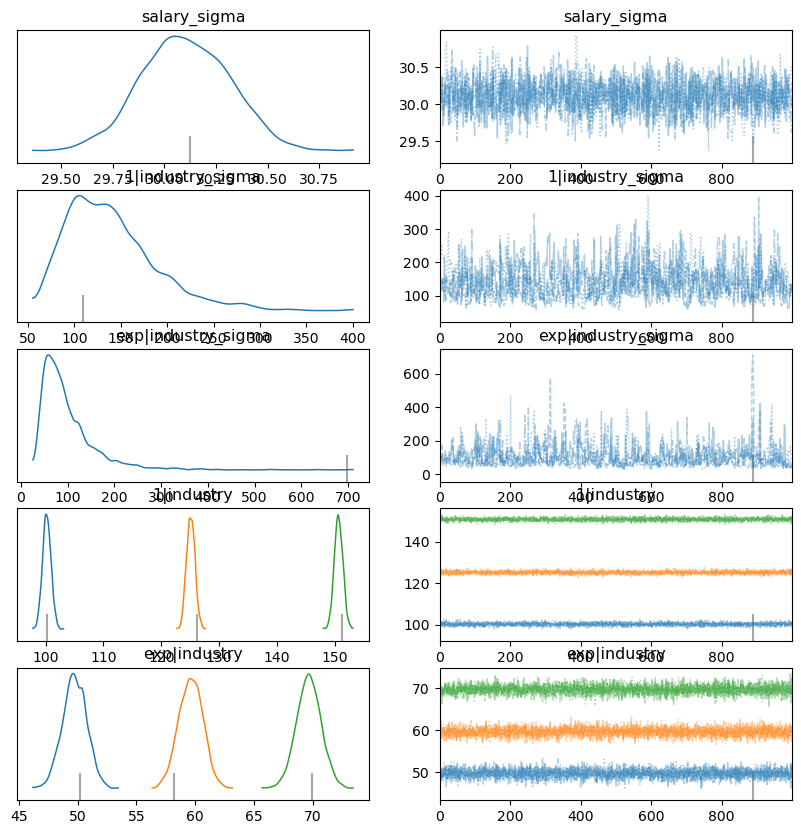

In [193]:
# Use ArviZ to plot the results
az.plot_trace(results, figsize=(10, 10), combined=True)

# Key summary and diagnostic info on the model parameters
az.summary(results)